In [21]:
import numpy as np   
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler  # 
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE,ADASYN

In [76]:
df=pd.read_csv(r"C:\Class_Notes\Machine Learning\Classification Models\Decision Tree\US_Heart_Patients.csv")

In [77]:
df.head(10)

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,Female,43.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,Female,63.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,Female,45.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,Male,52.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,Male,43.0,1.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [78]:
df['Heart-Att'].value_counts()

Heart-Att
0    3596
1     644
Name: count, dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


In [80]:
df.isnull().sum()

Gender               8
age                  2
education          110
currentSmoker        3
cigsPerDay          31
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol     60
Systolic BP          4
Diastolic BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

In [81]:
df.shape

(4240, 16)

In [82]:
# find the null values in percentage
df.isnull().sum()*100/df.shape[0]

Gender             0.188679
age                0.047170
education          2.594340
currentSmoker      0.070755
cigsPerDay         0.731132
BP Meds            1.415094
prevalentStroke    0.212264
prevalentHyp       0.047170
diabetes           0.047170
tot cholesterol    1.415094
Systolic BP        0.094340
Diastolic BP       0.117925
BMI                0.566038
heartRate          0.094340
glucose            9.221698
Heart-Att          0.000000
dtype: float64

In [83]:
cat = ['Gender','education','currentSmoker','BP Meds','prevalentStroke','prevalentHyp','diabetes']
num = ['age','cigsPerDay','tot cholesterol','Systolic BP','Diastolic BP','BMI','heartRate','glucose']

In [84]:
df.replace({'Male':1,'Female':0},inplace=True)

In [85]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [86]:
# Replace Numerical column by mean
for i in df[num].columns:
    df[i].fillna(df[i].mean(),inplace=True)

In [87]:
# Replace categorical column by mode
for i in df[cat].columns:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [88]:
df.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BP Meds            0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot cholesterol    0
Systolic BP        0
Diastolic BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64

### Model Building

In [89]:
x = df.drop('Heart-Att',axis=1)
y = df.pop('Heart-Att')

In [90]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=1)

In [91]:
x_train.shape

(2968, 15)

### KNN Classifier

In [92]:
KNN = KNeighborsClassifier()

In [93]:
KNN.fit(x_train,y_train)

KNeighborsClassifier()

 ### Model Evaluation

In [20]:
y_train_predict = KNN.predict(x_train)

Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

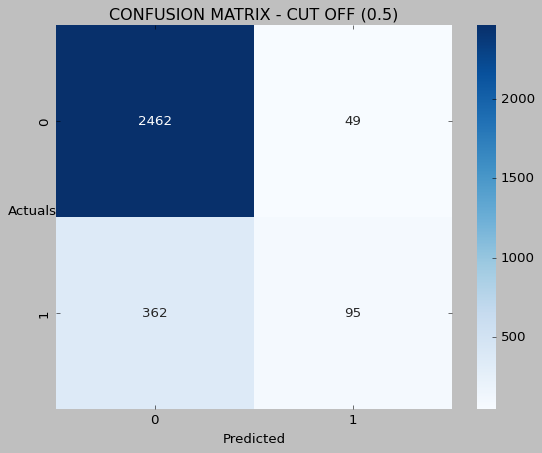

In [21]:
sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

In [22]:
print(metrics.classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2511
           1       0.66      0.21      0.32       457

    accuracy                           0.86      2968
   macro avg       0.77      0.59      0.62      2968
weighted avg       0.84      0.86      0.83      2968



In [23]:
# Here we have to focus on recall

AUC: 0.865


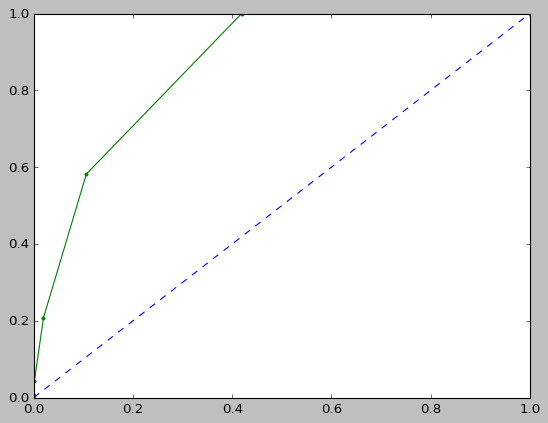

In [24]:
probs = KNN.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [25]:
y_test_predict = KNN.predict(x_test)

Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

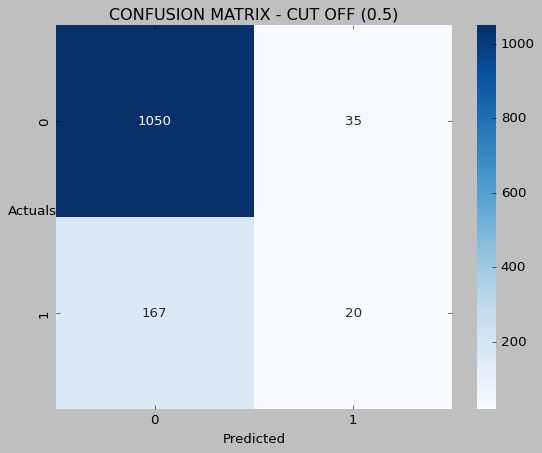

In [26]:
sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

In [27]:
print(metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1085
           1       0.36      0.11      0.17       187

    accuracy                           0.84      1272
   macro avg       0.61      0.54      0.54      1272
weighted avg       0.79      0.84      0.80      1272



AUC: 0.649


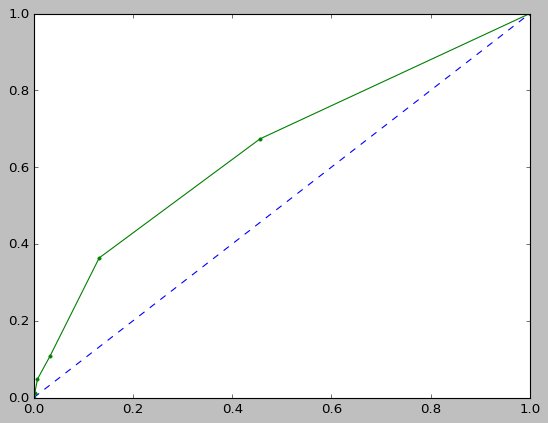

In [28]:
probs = KNN.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [29]:
# So it means KNN is also not good there is drastical change in aoc of train data and aoc of test data.
# It is overfitting in the train data it is good in the train data but it is underfitting in the test data it is not
# that good in the test data.

### Grid Search

In [30]:
# KNeighborsClassifier()

In [31]:
# Create param grid by shift tab in the KNeighborsClassifier() to see the parameters and based on that create param grid
# see the parameters of KNeighborsClassifier() and create the param grid.
param_grid={
    'n_neighbours' : [3,4,5,6,7].
    'weights' : ['uniform', 'distance'],
    'algorithm' :  ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

SyntaxError: invalid syntax (3241878510.py, line 5)

In [32]:
# HW to create grid search for KNN

# Esemble Model

#### Decision Tree with Bagging(Bootstrap Aggregation)

In [33]:
DT = DecisionTreeClassifier()

In [34]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
DT_y_train_predict = DT.predict(x_train)
DT_y_test_predict = DT.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2511
           1       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968



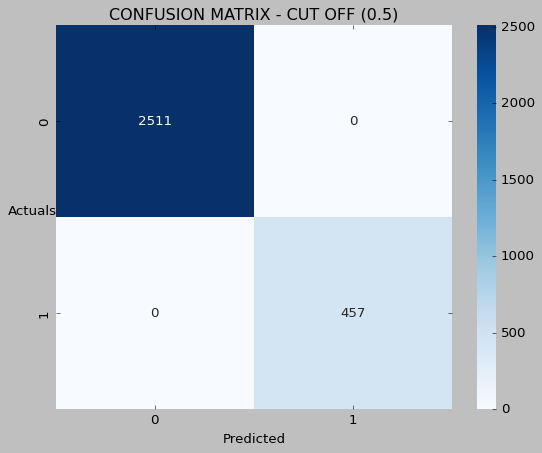

In [36]:
sns.heatmap((metrics.confusion_matrix(y_train,DT_y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train, DT_y_train_predict))

In [37]:
# The accuracy is 100% in train data mostly the decision Tree overfits in the train data.

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1085
           1       0.36      0.11      0.17       187

    accuracy                           0.84      1272
   macro avg       0.61      0.54      0.54      1272
weighted avg       0.79      0.84      0.80      1272



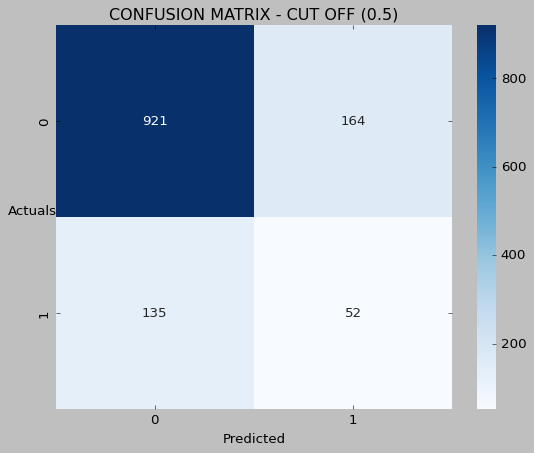

In [38]:
sns.heatmap((metrics.confusion_matrix(y_test,DT_y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test, y_test_predict))

In [39]:
# In test data accuracy is 84 but precision and recall suffers in this case.

In [40]:
# Now we will see that how we improve the model by using bagging.

## Bagging

In [41]:
bag_DT = BaggingClassifier(estimator=DT, n_estimators=50, random_state=42)
# in estimator we assign the model here we use Decision Tree so we assign Decision tree and then use that as DT, n_estimators = 50 we want to run the model 50 times.

In [42]:
bag_DT.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

In [43]:
bagDT_y_train_predict = bag_DT.predict(x_train)
bagDT_y_test_predict = bag_DT.predict(x_test)


In [44]:
# here 50 models will run means 50 subsets will created from real data but here we didnt mention the number of records its decided by model.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2511
           1       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968



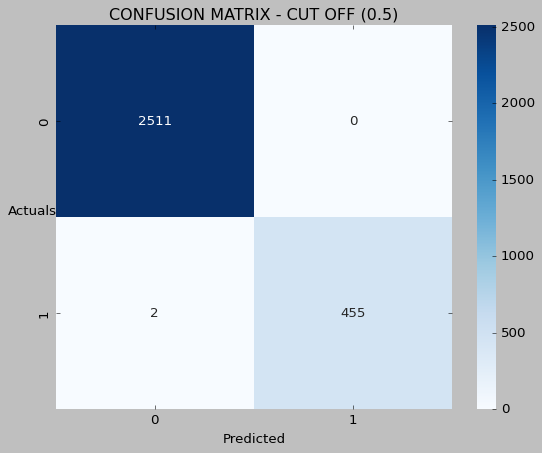

In [45]:
sns.heatmap((metrics.confusion_matrix(y_train,bagDT_y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train, bagDT_y_train_predict))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1085
           1       0.38      0.07      0.12       187

    accuracy                           0.85      1272
   macro avg       0.62      0.53      0.52      1272
weighted avg       0.79      0.85      0.80      1272



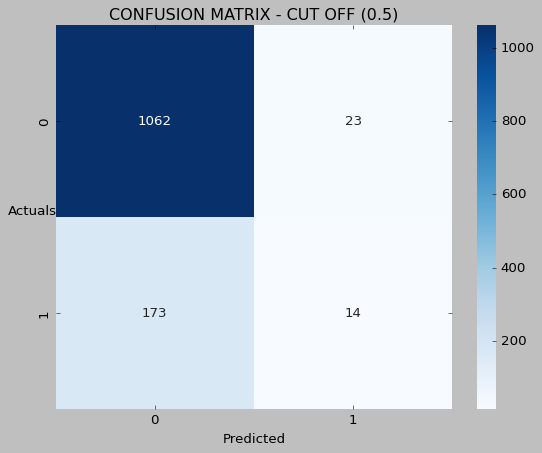

In [46]:
sns.heatmap((metrics.confusion_matrix(y_test,bagDT_y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test, bagDT_y_test_predict))

In [47]:
# here also the recall is very less we want more recall so now we will try with KNN.

In [48]:
bag_KNN = BaggingClassifier(estimator=KNN, n_estimators=100, random_state=42)
bag_KNN.fit(x_train,y_train)

BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=100,
                  random_state=42)

In [49]:
bag_KNN_y_train_predict = bag_KNN.predict(x_train)
bag_KNN_y_test_predict = bag_KNN.predict(x_test)


              precision    recall  f1-score   support

           0       0.87      0.99      0.93      2511
           1       0.77      0.19      0.30       457

    accuracy                           0.87      2968
   macro avg       0.82      0.59      0.61      2968
weighted avg       0.85      0.87      0.83      2968



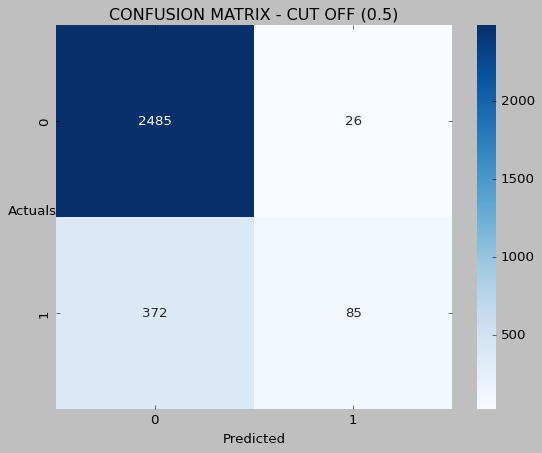

In [50]:
sns.heatmap((metrics.confusion_matrix(y_train,bag_KNN_y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train, bag_KNN_y_train_predict))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1085
           1       0.36      0.09      0.14       187

    accuracy                           0.84      1272
   macro avg       0.61      0.53      0.53      1272
weighted avg       0.79      0.84      0.80      1272



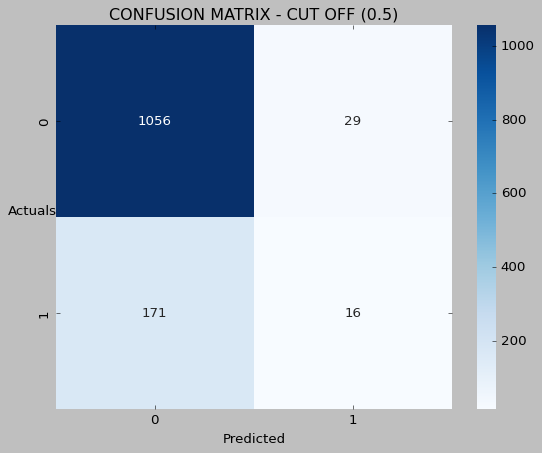

In [51]:
sns.heatmap((metrics.confusion_matrix(y_test,bag_KNN_y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test, bag_KNN_y_test_predict))

In [52]:
# At the end we create only one model but it is created by no of models here we
# give n_estimators=50 it means it is created by avg of 50 Decision Tree model 
# or avg of 50 KNN models.

In [53]:
# Bagging is also called as Bootstrap aggregation.

# Random Forest

In [54]:
RF = RandomForestClassifier(random_state=10)

In [55]:
RF.fit(x_train,y_train)

RandomForestClassifier(random_state=10)

In [56]:
RF_y_train_predict = RF.predict(x_train)
RF_y_test_predict = RF.predict(x_test)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2511
           1       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968



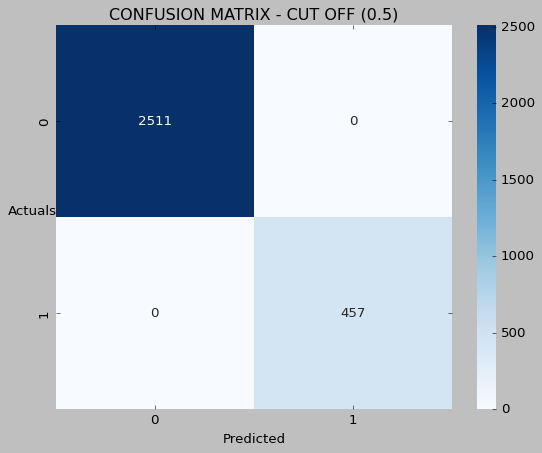

In [57]:
sns.heatmap((metrics.confusion_matrix(y_train,RF_y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train, RF_y_train_predict))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1085
           1       0.48      0.05      0.10       187

    accuracy                           0.85      1272
   macro avg       0.67      0.52      0.51      1272
weighted avg       0.80      0.85      0.80      1272



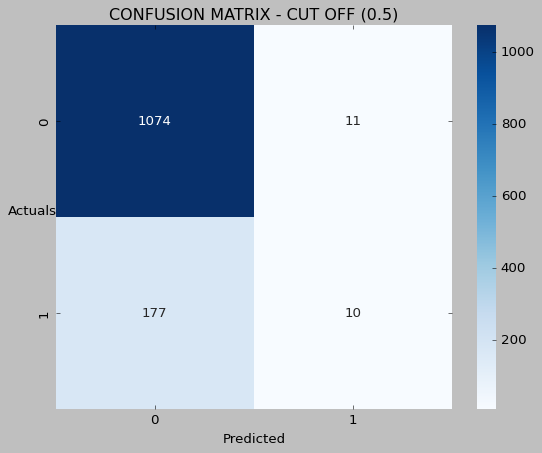

In [58]:
sns.heatmap((metrics.confusion_matrix(y_test,RF_y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test, RF_y_test_predict))

In [59]:
## here in this also in train data model is overfitting and in the test data recall will suffer.

### Random Forest with Grid Search

In [61]:
from sklearn.model_selection import GridSearchCV

rf_grid = RandomForestClassifier()
gr_space = {
    'max_depth': [3,5,7,10],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': [10, 20, 30 , 40],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(rf_grid, gr_space, cv = 3, scoring='accuracy', verbose = 3)
model_grid = grid.fit(x_train, y_train) 

print('Best hyperparameters are '+str(model_grid.best_params_))
print('Best score is: ' + str(model_grid.best_score_))

Fitting 3 folds for each of 240 candidates, totalling 720 fits
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.846 total time=   0.4s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.844 total time=   0.3s
[CV 3/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.847 total time=   0.4s
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.844 total time=   0.8s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.843 total time=   0.6s
[CV 3/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.847 total time=   0.6s
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=300;, score=0.845 total time=   0.9s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=300;, score=0.843 total time=   0.8s
[CV 3/3] END max_depth=3, max_fea

In [65]:
RF_model_grid_y_train_predict = model_grid.predict(x_train)
RF_model_grid_y_test_predict = model_grid.predict(x_test)


              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2511
           1       1.00      0.25      0.40       457

    accuracy                           0.89      2968
   macro avg       0.94      0.63      0.67      2968
weighted avg       0.90      0.89      0.85      2968



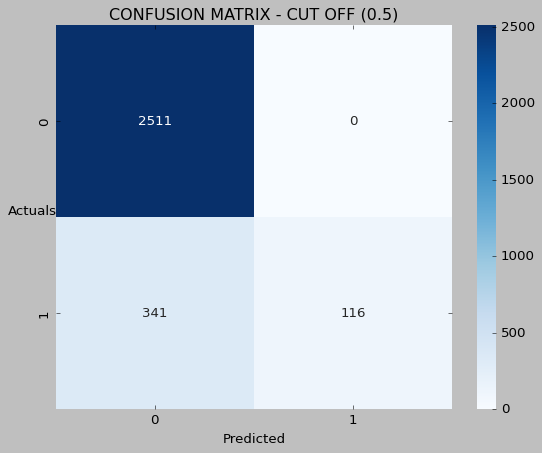

In [66]:
sns.heatmap((metrics.confusion_matrix(y_train,RF_model_grid_y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train, RF_model_grid_y_train_predict))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1085
           1       0.50      0.06      0.11       187

    accuracy                           0.85      1272
   macro avg       0.68      0.52      0.51      1272
weighted avg       0.81      0.85      0.80      1272



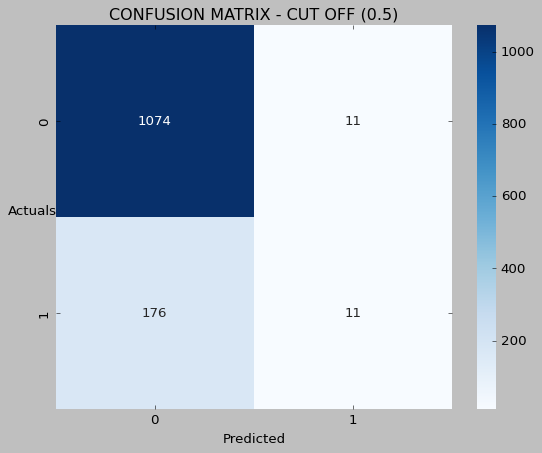

In [67]:
sns.heatmap((metrics.confusion_matrix(y_test,RF_model_grid_y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test, RF_model_grid_y_test_predict))

In [68]:
# Still in test datta recall is less now first we balance the data and then use grid search on that

In [74]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_resample, y_train_resample = smote.fit_resample(x_train,y_train)

In [79]:
df['Heart-Att'].value_counts()

Heart-Att
0    3596
1     644
Name: count, dtype: int64

In [75]:
x_train.shape

(2968, 15)

In [76]:
y_train.shape

(2968,)

In [77]:
x_train_resample.shape 

(5022, 15)

In [78]:
y_train_resample.shape 

(5022,)

In [82]:
from sklearn.model_selection import GridSearchCV

rf_grid = RandomForestClassifier()
gr_space = {
    'max_depth': [3,5,7,10],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': [10, 20, 30 , 40],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(rf_grid, gr_space, cv = 3, scoring='accuracy', verbose = 3)
model_grid = grid.fit(x_train_resample, y_train_resample) 

print('Best hyperparameters are '+str(model_grid.best_params_))
print('Best score is: ' + str(model_grid.best_score_))

Fitting 3 folds for each of 240 candidates, totalling 720 fits
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.707 total time=   0.7s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.762 total time=   0.6s
[CV 3/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.773 total time=   0.6s
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.706 total time=   1.5s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.761 total time=   1.5s
[CV 3/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.774 total time=   1.4s
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=300;, score=0.701 total time=   2.3s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=300;, score=0.760 total time=   1.5s
[CV 3/3] END max_depth=3, max_fea

# Boosting

## 1.AdaBoost

In [ ]:
adb = AdaBoostClassifier()

In [ ]:
adb.fit(x_train,y_train)

In [ ]:
adb_y_train_predict = adb.predict(x_train)
adb_y_test_predict = adb.predict(x_test)


In [ ]:
sns.heatmap((metrics.confusion_matrix(y_train,adb_y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train, adb_y_train_predict))

In [ ]:
sns.heatmap((metrics.confusion_matrix(y_test,adb_y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test, adb_y_test_predict))

In [ ]:
# HW run grid search for every model.

## 2.GradientBoost

In [ ]:
GB = GradientBoostingClassifier()

In [ ]:
GB.fit(x_train,y_train)

In [ ]:
GB_y_train_predict = GB.predict(x_train)
GB_y_test_predict = GB.predict(x_test)


In [ ]:
sns.heatmap((metrics.confusion_matrix(y_train,GB_y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train, GB_y_train_predict))

In [ ]:
sns.heatmap((metrics.confusion_matrix(y_test,GB_y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test, GB_y_test_predict))

### Gradient Boost using grid search

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],         # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],      # Step size shrinkage used in updates
    'max_depth': [3, 4, 5],                  # Maximum depth of individual trees
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'subsample': [0.8, 0.9, 1.0]             # Fraction of samples used for fitting individual base learners
}

grid_search = GridSearchCV(estimator=GB, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')


In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
GB_model_grid_y_train_predict = grid_search.predict(x_train)
GB_model_grid_y_test_predict = grid_search.predict(x_test)


In [ ]:
sns.heatmap((metrics.confusion_matrix(y_train,GB_model_grid_y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train, GB_model_grid_y_train_predict))

In [ ]:
sns.heatmap((metrics.confusion_matrix(y_test,GB_model_grid_y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test, GB_model_grid_y_test_predict))

In [ ]:
# Learn Multicollinearuty
# Learn Variance Inflation Factor.

In [ ]:
# Create Grid Search for all models.

In [1]:
# Whenever Distance Base algorithm is there do the scaling like here some data in the range 100's some in 0's and 1's so try by scaling the data.

## Scaling the data

In [43]:
df=pd.read_csv(r"C:\Class_Notes\Machine Learning\Classification Models\Decision Tree\US_Heart_Patients.csv")

In [44]:
cat = ['Gender','education','currentSmoker','BP Meds','prevalentStroke','prevalentHyp','diabetes']
num = ['age','cigsPerDay','tot cholesterol','Systolic BP','Diastolic BP','BMI','heartRate','glucose']


In [45]:
df.replace({'Male':1,'Female':0},inplace=True)

In [46]:
# Replace Numerical column by mean
for i in df[num].columns:
    df[i].fillna(df[i].mean(),inplace=True)
# Replace categorical column by mode
for i in df[cat].columns:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [47]:
df.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BP Meds            0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot cholesterol    0
Systolic BP        0
Diastolic BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64

In [49]:
scalar = StandardScaler()
model = scalar.fit(df.drop('Heart-Att',axis=1))
scaled_data = model.transform(df.drop('Heart-Att',axis=1))

In [50]:
x = scaled_data
y = df["Heart-Att"]

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,1.154224,-1.234478,2.008391,-0.98781,-0.758012,-0.173569,-0.077014,-0.670871,-0.162437,-0.940924,-1.196862,-1.083643,0.288215,0.344568,-0.216961,-0.423188
1,-0.866383,-0.417660,0.044693,-0.98781,-0.758012,-0.173569,-0.077014,-0.670871,-0.162437,0.300780,-0.515856,-0.159742,0.721369,1.595359,-0.260775,-0.423188
2,1.154224,-0.184284,-0.937156,1.01234,0.926103,-0.173569,-0.077014,-0.670871,-0.162437,0.187897,-0.220753,-0.243733,-0.112944,-0.072362,-0.523655,-0.423188
3,-0.866383,1.332664,1.026542,1.01234,1.768161,-0.173569,-0.077014,1.490599,-0.162437,-0.263631,0.800755,1.016133,0.684453,-0.906223,0.922188,2.363017
4,-0.866383,-0.417660,1.026542,1.01234,1.178721,-0.173569,-0.077014,-0.670871,-0.162437,1.090954,-0.107253,0.092231,-0.664230,0.761498,0.133546,-0.423188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,-0.866383,-0.184284,0.044693,1.01234,0.926103,-0.173569,-0.077014,-0.670871,-0.162437,0.255627,-0.061852,-0.915661,-0.934951,0.678112,0.177360,-0.423188
4236,-0.866383,-0.651037,-0.937156,1.01234,0.505074,-0.173569,-0.077014,-0.670871,-0.162437,-0.602277,-0.266154,0.344205,-1.633904,0.844884,0.000000,-0.423188
4237,-0.866383,0.282469,0.044693,-0.98781,-0.758012,-0.173569,-0.077014,-0.670871,-0.162437,0.729732,0.051649,0.008240,-1.065389,0.344568,1.097441,-0.423188
4238,1.154224,-1.117790,1.026542,-0.98781,-0.758012,-0.173569,-0.077014,1.490599,-0.162437,-1.166688,0.392152,1.268106,-0.048955,-0.739451,-0.436028,-0.423188


In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=1)

In [52]:
x_train

array([[-0.8663829 , -0.06759549, -0.93715636, ...,  0.50971444,
         1.67874504, -0.08552096],
       [ 1.15422408, -0.41766031,  1.02654167, ..., -0.74790758,
        -0.90622311, -0.74272215],
       [ 1.15422408, -0.41766031, -0.93715636, ..., -0.74298538,
        -1.4899256 , -0.34840143],
       ...,
       [ 1.15422408, -1.35116648,  0.04469266, ...,  1.24312219,
         1.59535897,  0.        ],
       [-0.8663829 ,  0.63253414,  0.04469266, ..., -0.67653568,
         0.76149828, -0.65509532],
       [-0.8663829 , -1.58454303, -0.93715636, ..., -0.80451287,
        -0.23913455, -0.30458802]])

In [42]:
x_test

array([[ 1.15422408, -1.58454303, -0.93715636, ...,  1.26034989,
        -0.32252062, -0.52365508],
       [ 1.15422408, -1.23447821,  0.04469266, ...,  0.62292503,
         1.59535897, -0.12933437],
       [-0.8663829 , -0.65103685,  0.04469266, ..., -1.11215035,
         0.76149828, -0.2169612 ],
       ...,
       [-0.8663829 , -0.06759549, -0.93715636, ...,  0.87641832,
         0.26118186, -0.08552096],
       [-0.8663829 ,  0.16578105,  0.04469266, ...,  0.39896495,
         0.34456793,  0.1335461 ],
       [-0.8663829 , -1.35116648, -0.93715636, ..., -1.01616746,
         0.76149828,  1.14125459]])

In [44]:
print(y_train)
print(y_test)

4033    0
3710    0
1453    0
2425    0
1010    0
       ..
2895    0
2763    0
905     0
3980    0
235     0
Name: Heart-Att, Length: 2968, dtype: int64
534     0
2751    0
3599    0
518     0
3813    0
       ..
1962    0
346     0
2346    0
582     0
3626    0
Name: Heart-Att, Length: 1272, dtype: int64


In [46]:
y_train.shape

(2968,)

In [48]:
y_test.shape

(1272,)

## Gradient descent with scaling

In [52]:
GB = GradientBoostingClassifier()

In [53]:
GB.fit(x_train,y_train)

GradientBoostingClassifier()

In [54]:
GB_y_train_predict = GB.predict(x_train)
GB_y_test_predict = GB.predict(x_test)


              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2511
           1       0.99      0.24      0.39       457

    accuracy                           0.88      2968
   macro avg       0.93      0.62      0.66      2968
weighted avg       0.90      0.88      0.85      2968



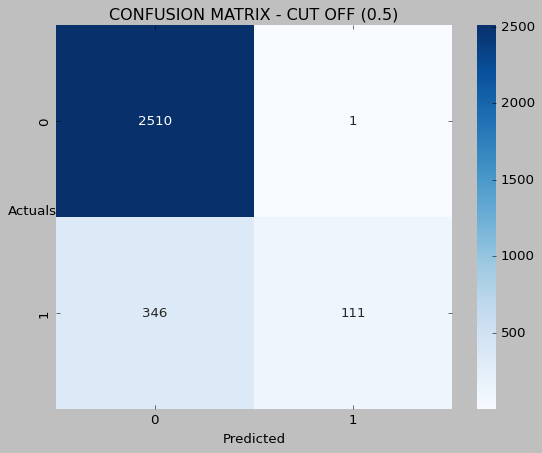

In [55]:
sns.heatmap((metrics.confusion_matrix(y_train,GB_y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train, GB_y_train_predict))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1085
           1       0.47      0.09      0.15       187

    accuracy                           0.85      1272
   macro avg       0.67      0.54      0.54      1272
weighted avg       0.81      0.85      0.81      1272



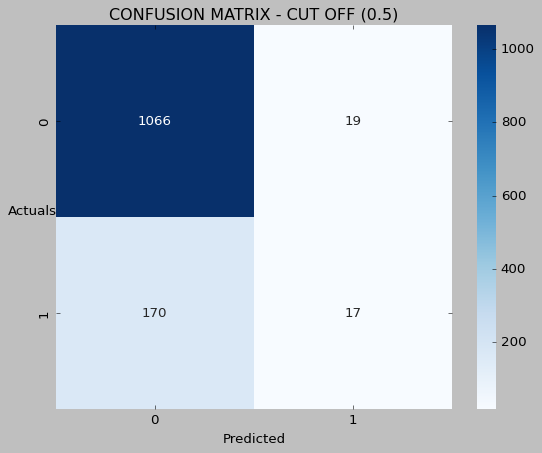

In [56]:
sns.heatmap((metrics.confusion_matrix(y_test,GB_y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test, GB_y_test_predict))

In [63]:
# After scaling also it give me the same result as it gives in the normal model.
# in distance algorithm scaling will work good so we use this scaling data in the KNN model bcz this model is the distance model.

## KNN with scaling

In [58]:
KNN = KNeighborsClassifier()

In [59]:
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [60]:
KNN_y_train_predict = KNN.predict(x_train)
KNN_y_test_predict = KNN.predict(x_test)

              precision    recall  f1-score   support

           0       0.87      0.98      0.93      2511
           1       0.71      0.22      0.33       457

    accuracy                           0.87      2968
   macro avg       0.79      0.60      0.63      2968
weighted avg       0.85      0.87      0.83      2968



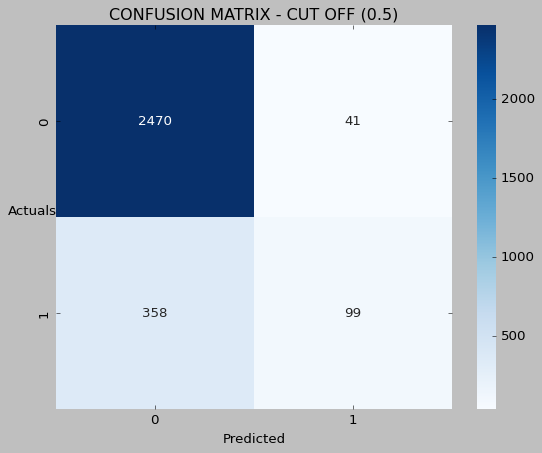

In [61]:
sns.heatmap((metrics.confusion_matrix(y_train,KNN_y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train, KNN_y_train_predict))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1085
           1       0.37      0.11      0.17       187

    accuracy                           0.84      1272
   macro avg       0.62      0.54      0.54      1272
weighted avg       0.79      0.84      0.80      1272



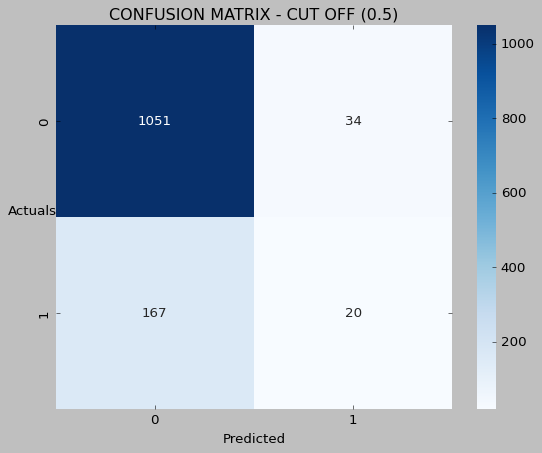

In [62]:
sns.heatmap((metrics.confusion_matrix(y_test,KNN_y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test, KNN_y_test_predict))

## SVM (Support Vector Machine)

Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. Its main goal is to find the optimal boundary, or hyperplane, that best separates different classes of data points in a high-dimensional space.

Key Concepts:
    
1. Hyperplane:

A decision boundary that separates data points from different classes.
SVM tries to maximize the margin between the hyperplane and the nearest data points of any class.

2.Support Vectors:

The data points that are closest to the hyperplane.
These points directly affect the position and orientation of the hyperplane.

3. Margin:

The distance between the hyperplane and the closest data points (support vectors).
SVM aims to maximize this margin to improve the model's robustness.

### How SVM Works:
    
SVM projects data into a higher-dimensional space where it can draw a clear separation between different classes, especially when the data is not linearly separable.
It uses kernels (like linear, polynomial, or RBF) to transform data into higher dimensions, allowing the algorithm to find an optimal hyperplane even in complex datasets.

### Use Cases:

Text classification, image recognition, bioinformatics, and other tasks where data is well-suited for a clear margin of separation.


### Point: SVM is effective for high-dimensional spaces and is often used in cases where a decision boundary is clearly required for separating classes.

In [2]:
from sklearn.svm import SVC

In [53]:
SVM = SVC()

In [58]:
# here the x_train, y_train used of scaling data.
SVM.fit(x_train,y_train)

SVC()

In [55]:
svm_y_train_predict = SVM.predict(x_train)
svm_y_test_predict = SVM.predict(x_test)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2511
           1       0.97      0.07      0.13       457

    accuracy                           0.86      2968
   macro avg       0.91      0.53      0.53      2968
weighted avg       0.87      0.86      0.80      2968



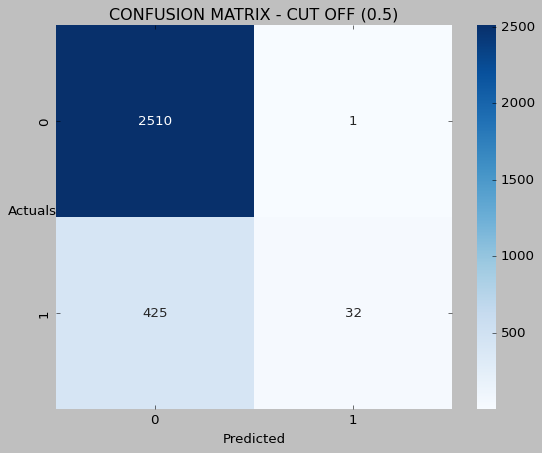

In [56]:
sns.heatmap((metrics.confusion_matrix(y_train,svm_y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train, svm_y_train_predict))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1085
           1       0.56      0.03      0.05       187

    accuracy                           0.85      1272
   macro avg       0.71      0.51      0.49      1272
weighted avg       0.81      0.85      0.79      1272



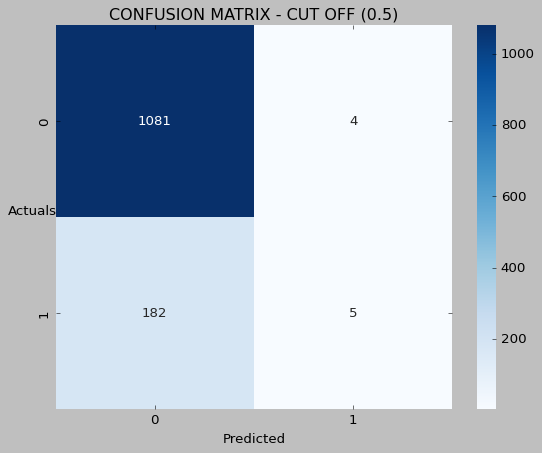

In [57]:
sns.heatmap((metrics.confusion_matrix(y_test,svm_y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test, svm_y_test_predict))

## Multiclass classification using SVM

In [60]:
LD= pd.read_csv("C:\Class_Notes\Machine Learning\Classification Models\KNN_RandomForest_EsembleModels(BaggingandBoosting)\letterdata.csv")

In [61]:
LD.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [64]:
from sklearn import svm

clf = svm.SVC(gamma=0.025,C=3)

In [67]:
x = LD.drop('letter',axis=1)
y = LD["letter"]

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=1)

In [69]:
clf.fit(x_train,y_train)

SVC(C=3, gamma=0.025)

In [70]:
clf_y_train_predict = clf.predict(x_train)
clf_y_test_predict = clf.predict(x_test)

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       556
           B       0.98      0.99      0.98       524
           C       1.00      0.99      0.99       509
           D       0.97      0.99      0.98       572
           E       0.99      0.99      0.99       554
           F       0.99      1.00      1.00       556
           G       0.99      0.99      0.99       544
           H       0.99      0.96      0.98       500
           I       0.99      0.99      0.99       556
           J       0.99      0.99      0.99       547
           K       0.99      0.99      0.99       542
           L       1.00      1.00      1.00       554
           M       1.00      1.00      1.00       563
           N       1.00      0.99      1.00       546
           O       0.99      0.99      0.99       494
           P       1.00      0.99      0.99       541
           Q       1.00      1.00      1.00       549
           R       0.98    

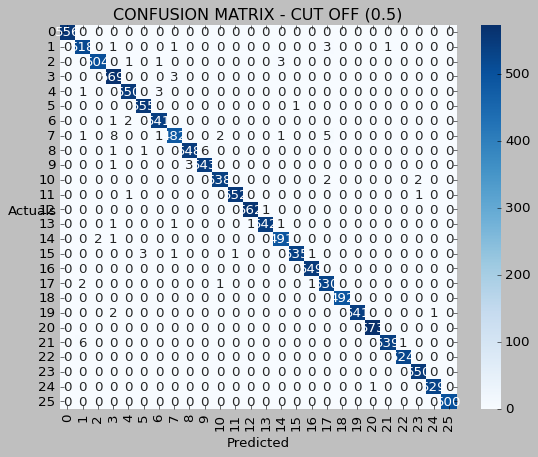

In [71]:
sns.heatmap((metrics.confusion_matrix(y_train,clf_y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train, clf_y_train_predict))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       233
           B       0.91      0.99      0.95       242
           C       0.99      0.98      0.98       227
           D       0.92      0.97      0.95       233
           E       0.95      0.98      0.96       214
           F       0.93      0.97      0.95       219
           G       0.98      0.97      0.97       229
           H       0.96      0.91      0.93       234
           I       0.95      0.96      0.96       199
           J       0.97      0.94      0.96       200
           K       0.96      0.96      0.96       197
           L       0.98      0.96      0.97       207
           M       0.98      0.98      0.98       229
           N       0.99      0.95      0.97       237
           O       0.98      0.97      0.97       259
           P       0.99      0.93      0.96       262
           Q       0.99      1.00      0.99       234
           R       0.92    

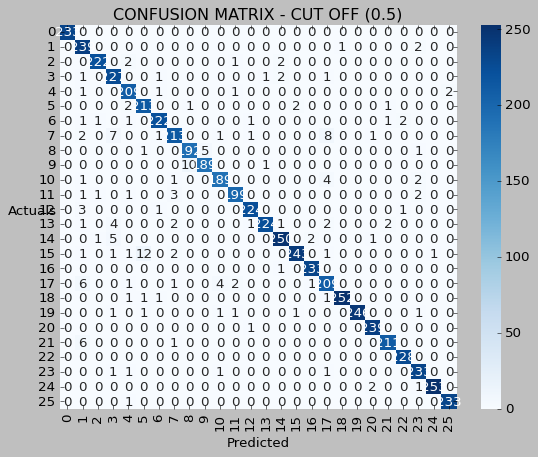

In [72]:
sns.heatmap((metrics.confusion_matrix(y_test,clf_y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test, clf_y_test_predict))

In [102]:
# This functions is for iterations on each model just we have to initialize the model and then fit the data then pass that in this function it will give the recall precision and accuracy.

In [73]:
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [103]:
# This function is used to create the confusion matrix for models just we have to pass the model after fitting the model pass that model in this function and then it will create the confusion matrix for that model.

In [98]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(x_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

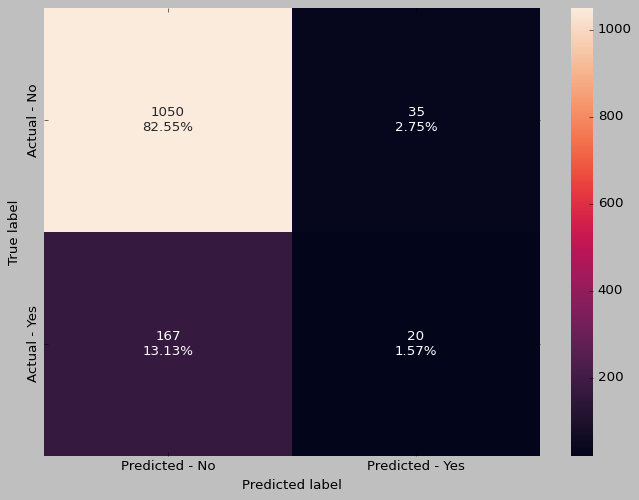

In [99]:
make_confusion_matrix(KNN,y_test,labels=[1, 0])